In [ ]:
import argparse
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import data_processing

import pyflux as pf
import statsmodels.api as sm

import sklearn as skl
from sklearn import metrics

In [ ]:
df = pd.read_csv("../data/processed_data.csv")

In [ ]:
def split_data(df):
    # TODO: Split data into training and validation sets (the test set is already provided in data/test_data.csv)
    
    # Define split time
    split_stamp = pd.Timestamp(year=2023, month=1, day=1, hour=22,tz="Europe/Berlin")
    
    # Split data set
    X_train = df[df.timestamp <= split_stamp]
    X_val = df[df.timestamp > split_stamp]
    y_train = df[df.timestamp <= split_stamp]
    y_val = df[df.timestamp > split_stamp]

    return X_train, X_val, y_train, y_val

In [ ]:
# Test
datetime_start = pd.Timestamp(year=2021,month=12,day=31,hour=23)
datetime_end = pd.Timestamp(year=2022,month=12,day=31,hour=23)


S = pd.Series(pd.date_range(start=datetime_start,end=datetime_end,freq="1H"))
len(S)

8761

In [ ]:
df["timestamp"]=pd.date_range(start=datetime_start,end=datetime_end,freq="1H")

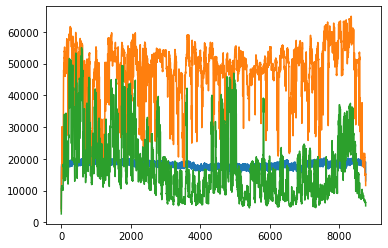

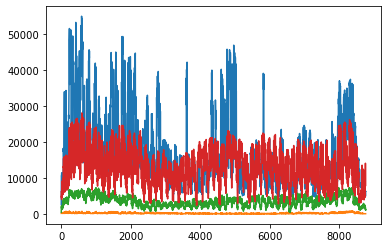

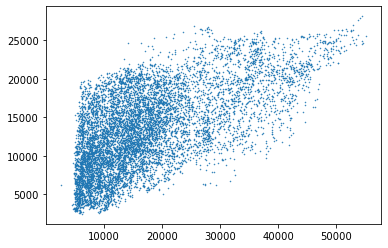

In [ ]:
plt.plot(df.DE_B01_MAW)
plt.plot(df.DE_B02_MAW)
plt.plot(df.DE_B04_MAW)
plt.show()

plt.plot(df.DE_B04_MAW)
plt.plot(df.DK_B04_MAW)
plt.plot(df.HU_B04_MAW)
plt.plot(df.IT_B04_MAW)
plt.show()


plt.plot(df.DE_B04_MAW,df.IT_B04_MAW,".",markersize=1)


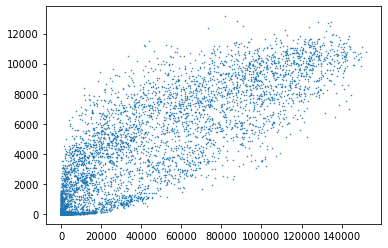

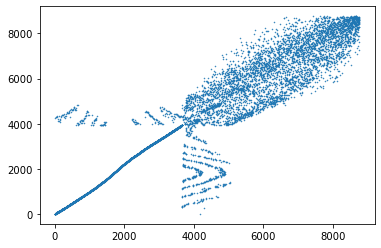

In [ ]:
plt.plot(df.DE_B16_MAW,df.IT_B16_MAW,".",markersize=1)
plt.show()

plt.plot(df.DE_B16_MAW.rank(method="first"),df.IT_B16_MAW.rank(method="first"),".",markersize=1)
plt.show()


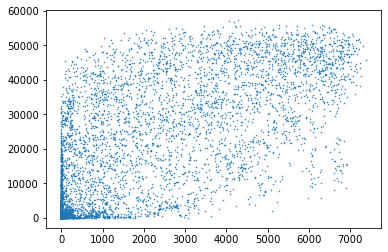

In [ ]:
plt.plot(df.HU_B16_MAW,df.SP_B16_MAW,".",markersize=1)

Normal ARIMA(4,0,0)                                                                                       
======================================================= ==================================================
Dependent Variable: DE_green_MAW                        Method: MLE                                       
Start Date: 4                                           Log Likelihood: -105219.2328                      
End Date: 8760                                          AIC: 210450.4656                                  
Number of observations: 8757                            BIC: 210492.9313                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 111600.916 1185.156   94.1656  0.0      (109278.0111 | 113923.822
AR(1)                                

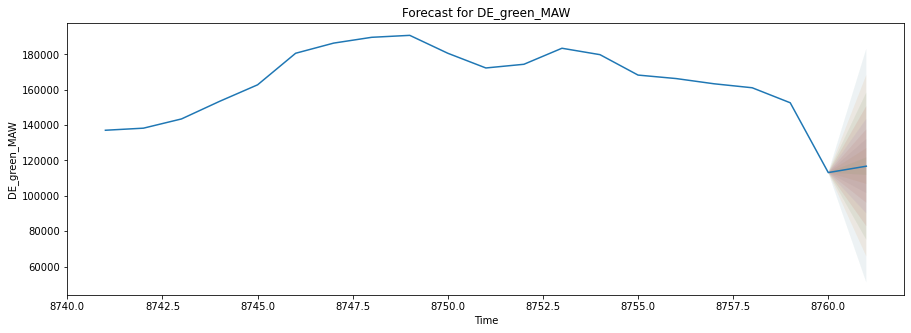

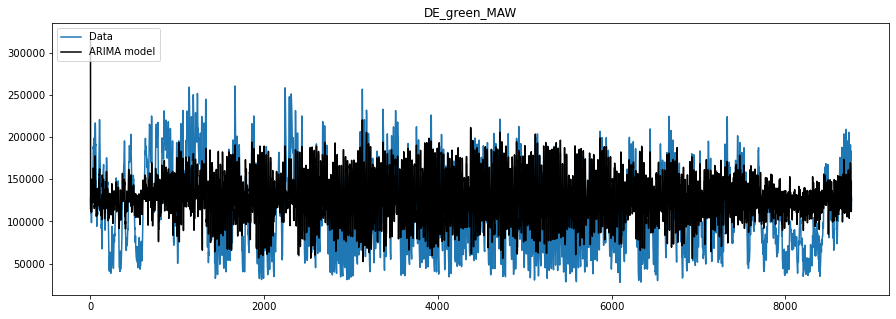

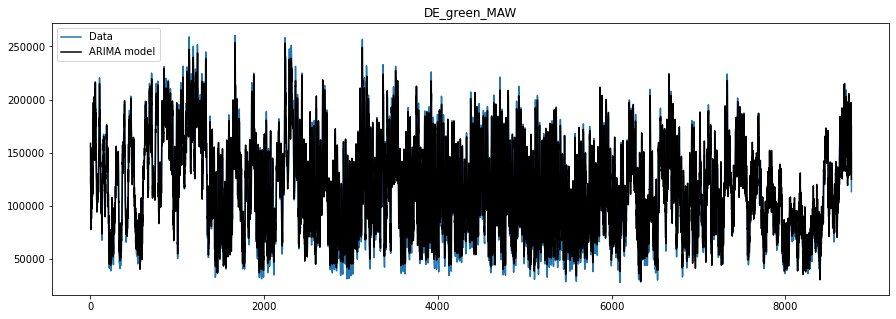

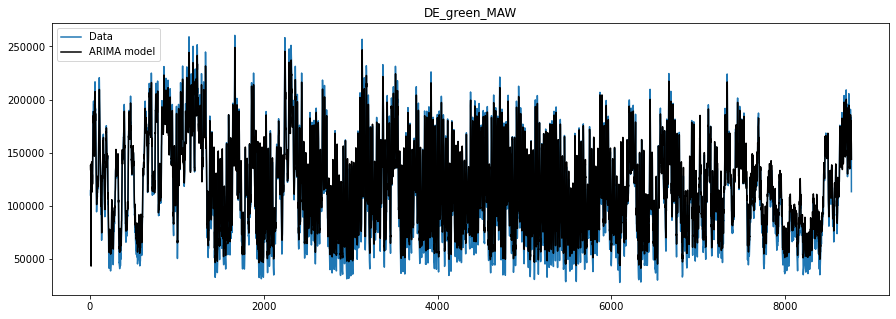

In [ ]:
model_1 = pf.ARIMA(data=df,target="DE_green_MAW", ar=4, ma=0, family=pf.Normal())
model_2 = pf.ARIMA(data=df,target="DE_green_MAW", ar=4, ma=4, family=pf.Normal())
model_3 = pf.ARIMA(data=df,target="DE_green_MAW", ar=2, ma=7, family=pf.Normal())

m1 = model_1.fit("MLE")
m1.summary()
m2 = model_2.fit("MLE")
m2.summary()
m3 = model_3.fit("MLE")
m3.summary()

model_1.plot_predict(h=1,figsize=(15,5))
model_1.plot_fit(figsize=(15,5))
model_2.plot_fit(figsize=(15,5))
model_3.plot_fit(figsize=(15,5))

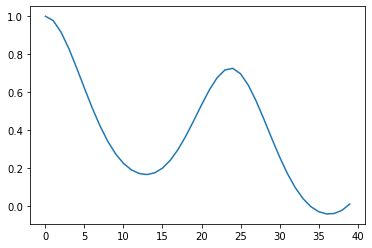

In [ ]:
plt.plot(sm.tsa.acf(df.DE_green_MAW))

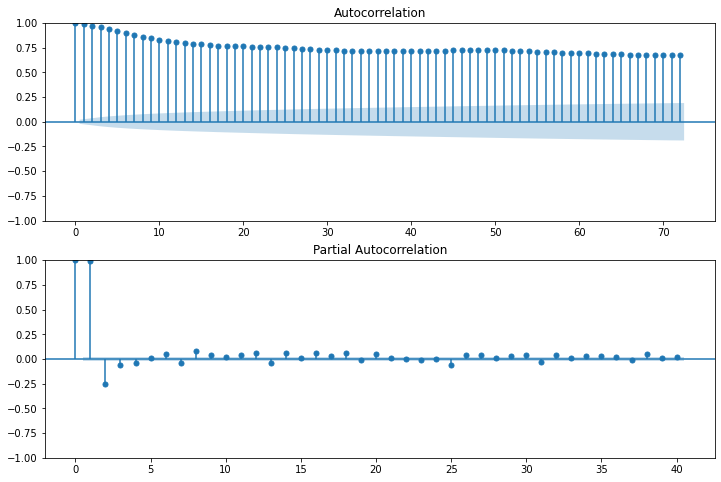

In [ ]:
data=df.UK_green_MAW

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.squeeze(), lags=72, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

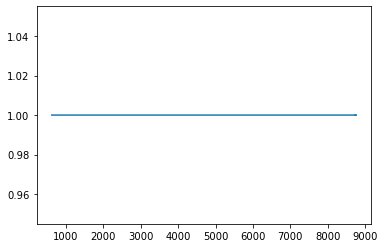

In [ ]:
plt.plot(df.UK_B19_MAW/df.UK_green_MAW)

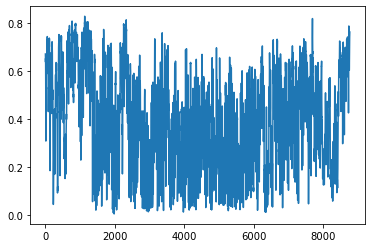

In [ ]:
plt.plot(df.DE_B19_MAW/df.DE_green_MAW)

In [ ]:
data = df.IT_green_MAW

model_1 = sm.tsa.ARIMA(data, order=(4,0,7)).fit()
model_1.params

c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


const       9488.391088
ar.L1          1.938820
ar.L2         -0.021079
ar.L3         -1.910092
ar.L4          0.992339
ma.L1         -0.565809
ma.L2         -1.575109
ma.L3          0.511998
ma.L4          0.825778
ma.L5          0.290798
ma.L6         -0.210711
ma.L7         -0.226794
sigma2    762146.918832
dtype: float64

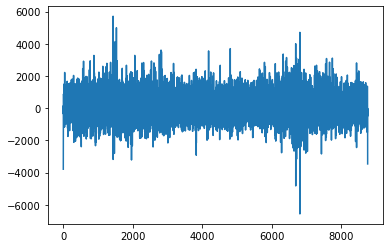

In [ ]:
plt.plot(model_1.resid.values)

In [ ]:
cut_off = 6000

gen_data_DK = df.DK_green_MAW
gen_data_DE = df.DE_green_MAW

load_data_DK = df.DK_load_MAW
load_data_DE = df.DE_load_MAW


model_1_DK_Gen_Tr = sm.tsa.SARIMAX(gen_data_DK[:cut_off], order=(4,0,7)).fit()
model_1_DK_Gen_Tr.params

model_1_DE_Gen_Tr = sm.tsa.SARIMAX(gen_data_DE[:cut_off], order=(4,0,7)).fit()
model_1_DE_Gen_Tr.params

model_1_DK_Load_Tr = sm.tsa.SARIMAX(load_data_DK[:cut_off], order=(4,0,7)).fit()
model_1_DK_Load_Tr.params

model_1_DE_Load_Tr = sm.tsa.SARIMAX(load_data_DE[:cut_off], order=(4,0,7)).fit()
model_1_DE_Load_Tr.params



# Static one step ahead FC: 
model_1_DK_Gen = sm.tsa.SARIMAX(gen_data_DK, order=(4,0,7)).filter(model_1_DK_Gen_Tr.params)
model_1_DE_Gen = sm.tsa.SARIMAX(gen_data_DE, order=(4,0,7)).filter(model_1_DK_Gen_Tr.params)
 
model_1_DK_Load = sm.tsa.SARIMAX(load_data_DK, order=(4,0,7)).filter(model_1_DK_Load_Tr.params)
model_1_DE_Load = sm.tsa.SARIMAX(load_data_DE, order=(4,0,7)).filter(model_1_DK_Load_Tr.params)




c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


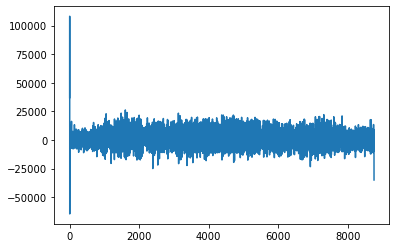

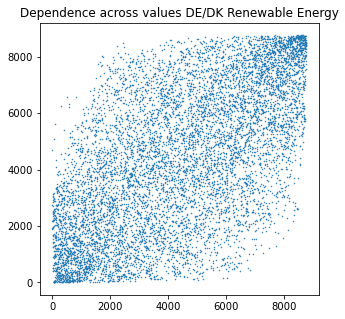

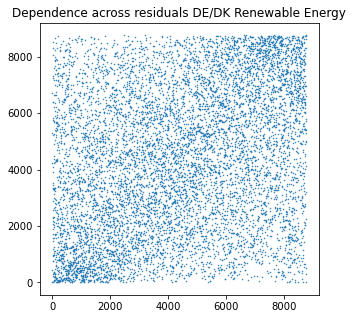

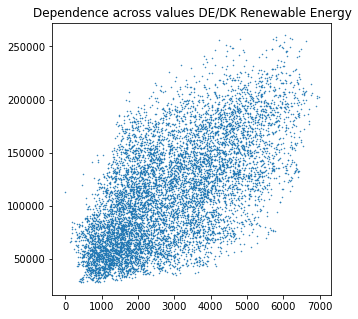

0.6343438768562952


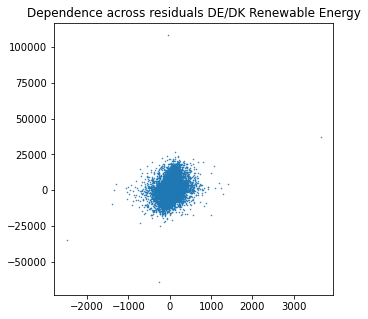

0.2803106168467691


In [ ]:
res_DK=pd.Series(model_1_DK.resid.values)
res_DE=pd.Series(model_1_DE.resid.values)

plt.plot(res_DE)
plt.show()


plt.figure(figsize=(5,5))
plt.plot(data_DK.rank(),data_DE.rank(),".",markersize=1)
plt.title("Dependence across values DE/DK Renewable Energy")
plt.show()


plt.figure(figsize=(5,5))
plt.plot(res_DK.rank(),res_DE.rank(),".",markersize=1)
plt.title("Dependence across residuals DE/DK Renewable Energy")
plt.show()


plt.figure(figsize=(5,5))
plt.plot(data_DK,data_DE,".",markersize=1)
plt.title("Dependence across values DE/DK Renewable Energy")
plt.show()
print(data_DK.corr(data_DE))

plt.figure(figsize=(5,5))
plt.plot(res_DK,res_DE,".",markersize=1)
plt.title("Dependence across residuals DE/DK Renewable Energy")
plt.show()
print(res_DK.corr(res_DE))

Dependence between DK/DE substantially reduced by correcting for TS component

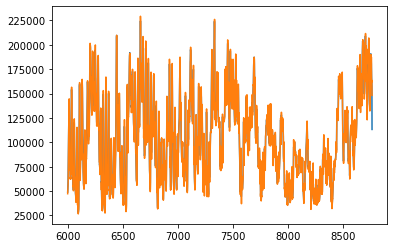

In [ ]:
plt.plot(data_DE[6000:])
plt.plot(model_1_DE.predict()[6000:])

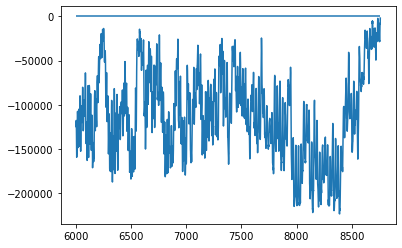

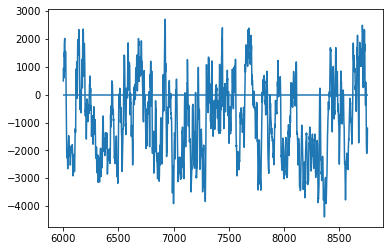

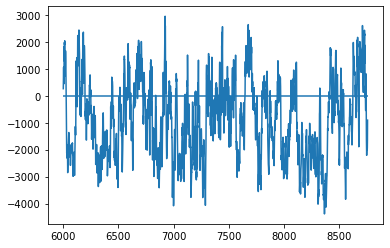

In [ ]:
plt.plot(gen_data_DE[6000:]-load_data_DE[6000:])
plt.hlines(0,xmin=6000,xmax=len(gen_data_DE))
plt.show()

plt.plot(gen_data_DK[6000:]-load_data_DK[6000:])
plt.hlines(0,xmin=6000,xmax=len(gen_data_DE))
plt.show()

plt.plot(model_1_DK_Gen.predict()[6000:]-model_1_DK_Load.predict()[6000:])
plt.hlines(0,xmin=6000,xmax=len(gen_data_DE))
plt.show()




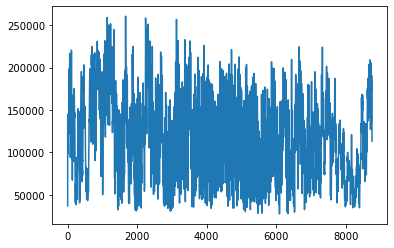

In [ ]:
plt.plot(df.DE_green_MAW)

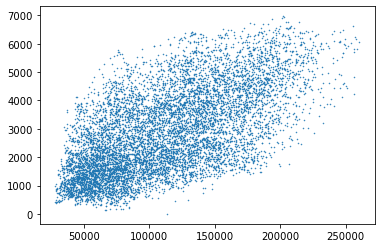

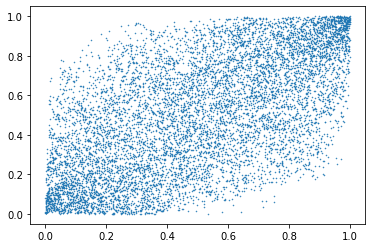

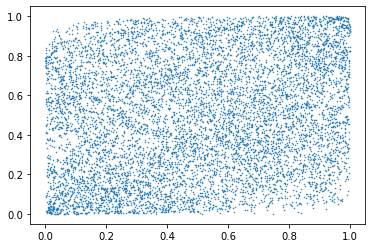

In [ ]:
plt.plot(df.DE_green_MAW,df.DK_green_MAW,".",markersize=1)
plt.show()
plt.plot(df.DE_green_MAW.rank()/len(df),df.DK_green_MAW.rank()/len(df),".",markersize=1)
plt.show()
plt.plot(df.SP_green_MAW.rank()/len(df),df.DK_green_MAW.rank()/len(df),".",markersize=1)
plt.show()

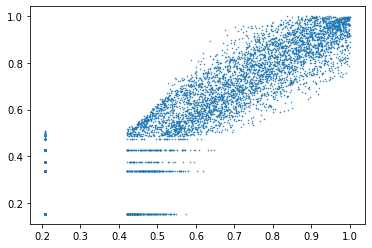

In [ ]:
plt.plot(df.DE_B16_MAW.rank()/len(df),df.DK_B16_MAW.rank()/len(df),".",markersize=1)
plt.show()

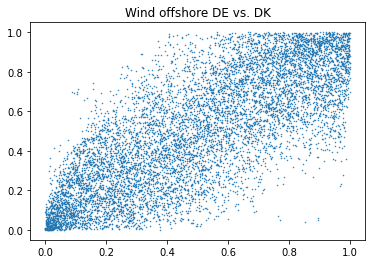

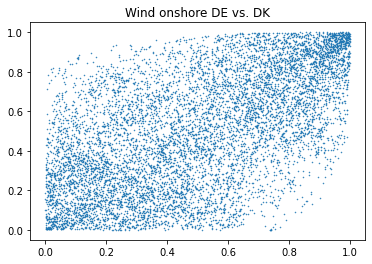

In [ ]:

plt.plot(df.DE_B18_MAW.rank()/len(df),df.DK_B18_MAW.rank()/len(df),".",markersize=1)
plt.title("Wind offshore DE vs. DK")
plt.show()


plt.plot(df.DE_B19_MAW.rank()/len(df),df.DK_B19_MAW.rank()/len(df),".",markersize=1)
plt.title("Wind onshore DE vs. DK")
plt.show()



In [356]:
len(data)*0.8


7008.8

In [347]:
country_labels = ['HU', 'IT', 'PO', 'SP', 'UK', 'DE', 'DK', 'SE', 'NE']
#country_labels = [ 'DK', 'SE', 'NE']


data = pd.read_csv("../data/processed_data.csv")

green_gen_dict = dict()
load_dict = dict()

model_gen_training_dict = dict()
model_load_training_dict = dict()

model_gen_test_dict = dict()
model_load_test_dict = dict()

cut_off = 6000

# Model Training and initialization
for country in country_labels:
    
    green_gen_dict[country] = country + "_green_MAW"
    load_dict[country] = country + "_load_MAW"
    
    model_gen_training_dict[country] = sm.tsa.SARIMAX(data[green_gen_dict[country]][:cut_off], order=(4,0,12)).fit()
    model_load_training_dict[country] = sm.tsa.SARIMAX(data[load_dict[country]][:cut_off], order=(4,0,12)).fit()
    
    model_gen_test_dict[country] = sm.tsa.SARIMAX(data[green_gen_dict[country]], order=(4,0,12)).filter(model_gen_training_dict[country].params)
    model_load_test_dict[country] = sm.tsa.SARIMAX(data[load_dict[country]], order=(4,0,12)).filter(model_load_training_dict[country].params)
    print(country+" has been trained successfully")





c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


HU has been trained successfully


c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


IT has been trained successfully


c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


PO has been trained successfully


c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SP has been trained successfully


c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


UK has been trained successfully


c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


DE has been trained successfully


c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


DK has been trained successfully


c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SE has been trained successfully


c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\49176\anaconda3\envs\test\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


NE has been trained successfully


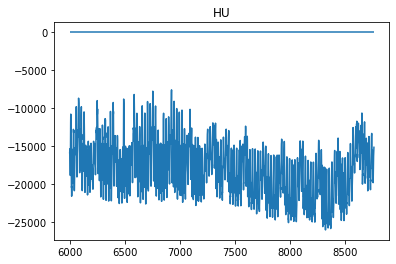

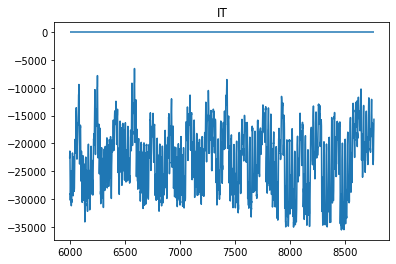

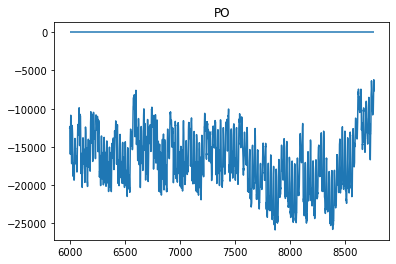

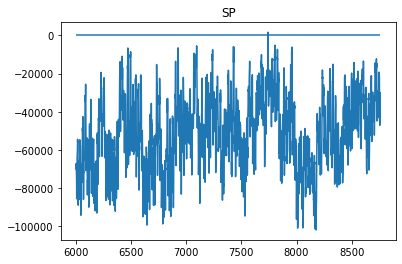

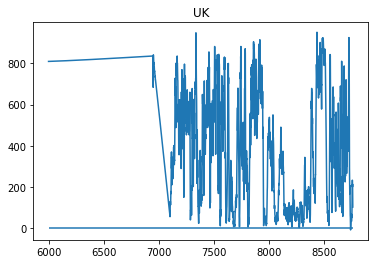

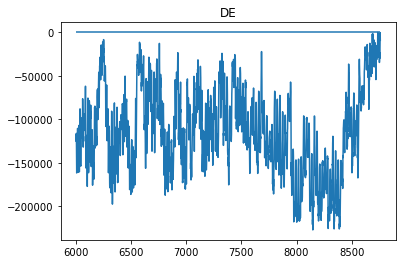

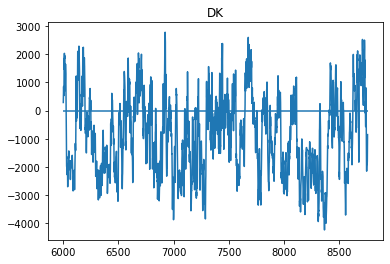

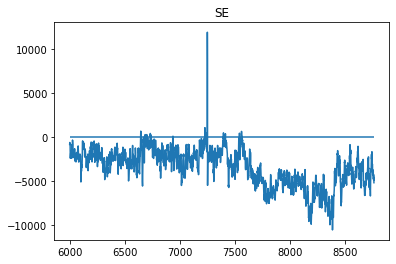

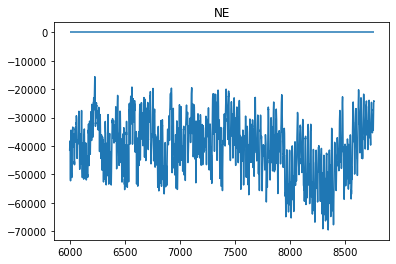

In [350]:


for country in country_labels:
    
    plt.plot(model_gen_test_dict[country].predict()[cut_off:]-model_load_test_dict[country].predict()[cut_off:])
    plt.hlines(0,xmin=6000,xmax=len(data))
    plt.title(country)
    plt.show()

In [351]:
surplus_pred_df = pd.DataFrame()

for country in country_labels:
    surplus_pred_df[country] = model_gen_test_dict[country].predict()[cut_off:]-model_load_test_dict[country].predict()[cut_off:]

surplus_pred_df = surplus_pred_df.drop('UK',axis=1)

print(surplus_pred_df.head())
surplus_pred_df["Max"]=surplus_pred_df.idxmax(axis=1)



                HU            IT            PO            SP             DE  \
6000 -15863.330104 -22536.994957 -12512.496834 -69964.370484 -124959.983116   
6001 -15529.603941 -21700.049014 -12342.171684 -68435.140823 -117600.768622   
6002 -15359.021786 -21375.076125 -12326.339416 -67075.709367 -117891.885959   
6003 -15495.658071 -22651.203984 -12617.128701 -69561.958851 -116078.325504   
6004 -16804.610679 -25710.208929 -13707.381341 -71322.127751 -130466.174511   

              DK          SE            NE  
6000  287.684473 -786.947443 -41383.774037  
6001  466.945599 -573.293643 -39223.804570  
6002  725.728640 -596.741566 -38982.461072  
6003  855.968684 -715.774805 -38226.938046  
6004  679.658968 -824.416563 -39598.933758  


Model FC: Macro
0.45613246568828614
Naive FC: Macro
0.6027155852471571
Danske FC: Macro
0.31050051599587203
Model FC: Weighted
0.9602187846370556
Naive FC: Weighted
0.956723055855498
Danske FC: Weighted
0.8120696218783744


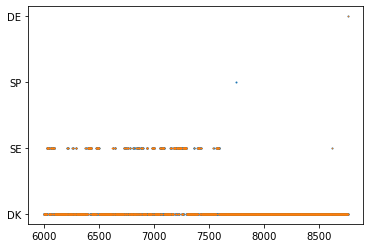

In [352]:
plt.plot(surplus_pred_df["Max"],".", markersize=2)

plt.plot(data["max_surplus_country_name"][cut_off:],".",markersize=1)

DK_series = pd.Series("DK").repeat(len(surplus_pred_df["Max"]))

print("Model FC: Macro")
print(skl.metrics.f1_score(data["max_surplus_country_name"][cut_off:],surplus_pred_df["Max"],average='macro'))

print("Naive FC: Macro")
print(skl.metrics.f1_score(data["max_surplus_country_name"][cut_off:],data["max_surplus_country_name"][cut_off-1:-1],average='macro'))

print("Danske FC: Macro")
print(skl.metrics.f1_score(data["max_surplus_country_name"][cut_off:],DK_series,average='macro'))


print("Model FC: Weighted")
print(skl.metrics.f1_score(data["max_surplus_country_name"][cut_off:],surplus_pred_df["Max"],average='weighted'))

print("Naive FC: Weighted")
print(skl.metrics.f1_score(data["max_surplus_country_name"][cut_off:],data["max_surplus_country_name"][cut_off-1:-1],average='weighted'))

print("Danske FC: Weighted")
print(skl.metrics.f1_score(data["max_surplus_country_name"][cut_off:],DK_series,average='weighted'))


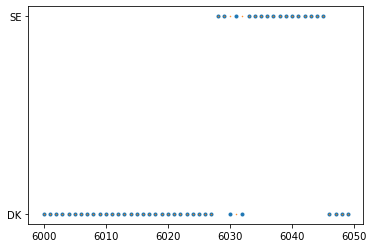

In [ ]:
plt.plot(surplus_pred_df["Max"][:50],".")

plt.plot(data["max_surplus_country_name"][6000:6050],".",markersize=1)

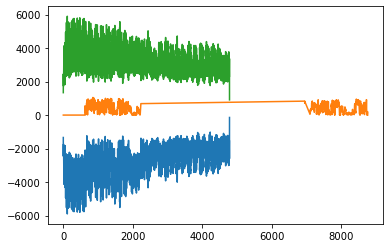

In [353]:
plt.plot(data.UK_green_MAW - data.UK_load_MAW)
plt.plot(data.UK_green_MAW)
plt.plot(data.UK_load_MAW)